**New File:**

- Definir funcion general, meter en carpetas:
- Quedarme con las columnas potenciales, aun sean muchas.
- Limpiarlas bien
- Transformar los datos para que los Modelos interpreten mejor los datos
    - En las columnas que sea convenientes convertir los datos por nivel de importancia, ej, 0 menos-1medio-2mayor
    - Hay que normalizar?
    - Hay que estandarizar?
- Hacer un arbol de decision, para que nos digan niveles de importancia de las diferentes caracteristicas.
    https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
- Hacer un heatplot
- preparar los modelos, sin parametros especificos
- Preparar 2 modelos modificandop algunos parametros.


In [1]:
import time                                                 # para tiempo
inicio=time.time()                                          # momento inicial

import pandas as pd                                         # dataframe
import numpy as np                                          # numerical python, algebra lineal
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt                             # plots, graficos
import seaborn as sns                                       # plots

import warnings                                             # avisos
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [2]:
from sklearn.model_selection import train_test_split as tts

In [3]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import SGDClassifier as SGDC

In [4]:
from sklearn.metrics import mean_squared_error as mse

**Funciones**


In [6]:
def trash_d(df):
    df_col = df.columns
    trash = []
    for i in df_col:
        if 'url' in i:

            trash.append(i)
        elif 'id' in i:

            trash.append(i)
        elif 'name' in i:

            trash.append(i)
        elif 'scrape' in i:

            trash.append(i)
        elif 'license' in i: #is it relevant??

            trash.append(i)
        elif 'latitude' in i:

            trash.append(i)
        elif 'longitude' in i:

            trash.append(i)

    print(trash)
    return df.drop(trash,axis=1,inplace=True)

In [7]:
def delete_nan(df):
    data_1 = df.loc[:, df.isnull().mean() >= .5]
    print(data_1.columns)
    return df.drop(data_1,axis=1,inplace=True)

In [70]:
def bin_corr_col(x):
                                        
    corr_matrix = x.corr().abs()# Create correlation matrix
                                        
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Select upper triangle of correlation matrix
    
    to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]# Find features with correlation greater than 0.90
    print(to_drop)

    return x.drop(to_drop, axis=1, inplace=True) # Drop features

In [71]:
def fill_nan(df):
    
    for i in df.columns:
        
        df.fillna(round(df[i].mean(),3), inplace=True)

    print(df.isna().sum())

In [72]:
import re

patron='[0-9]+'

def limpieza_ba(x):
    n_ba=0
    
    try:
        n_ba=int(re.findall(patron, x)[0])
    except:
        n_ba=0
        
    return n_ba

In [73]:
def prueba_modelo(modelo):

    modelo.fit(X_train, y_train)

    y_pred=modelo.predict(X_test)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    
    print(modelo)
    print('Train:', train_score)
    print('Test:', test_score) 
    print('\n')

In [74]:
def review_scores(df):
    df_NAN_1 = df.copy()
    df_NAN_2=df_NAN_1[['review_scores_rating','review_scores_checkin','review_scores_location']]
    df_NAN_3 = df_NAN_2.apply(fill_nan)
    df.assign(RER=df_NAN_3.review_scores_rating.values,
              RSC=df_NAN_3.review_scores_checkin.values,
              RSL=df_NAN_3.review_scores_location.values)
    
    

## 1.Train CSV:

**Import Train Data:**

In [75]:
df_train = pd.read_csv('data/train.csv')

In [76]:
df_TN = df_train._get_numeric_data()

In [77]:
trash_d(df_TN)

['id', 'scrape_id', 'host_id', 'latitude', 'longitude']


In [78]:
delete_nan(df_TN)

Index(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'], dtype='object')


### 70% de correlacion:

In [79]:
bin_corr_col(df_TN)

['host_total_listings_count', 'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_l30d', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_value', 'reviews_per_month']


In [80]:
#sns.heatmap(df_TN.corr());

### Tratamiento de los Nan VALUES rows

### Review Score Mean - Nan

In [81]:
df_NAN_1 = df_TN[['review_scores_rating','review_scores_checkin','review_scores_location']]


In [82]:
fill_nan(df_NAN_1)

review_scores_rating      0
review_scores_checkin     0
review_scores_location    0
dtype: int64


/var/folders/xt/vx2zkv116hb1jvz92s1nlr2r0000gn/T/ipykernel_52588/4126439838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(round(df[i].mean(),3), inplace=True)


In [83]:
df_TN = df_TN.assign(RER=df_NAN_1.review_scores_rating.values,
              RSC=df_NAN_1.review_scores_checkin.values,
              RSL=df_NAN_1.review_scores_location.values)

In [84]:
cols_del = ['review_scores_rating','review_scores_checkin','review_scores_location']
df_TN.drop(cols_del, axis=1, inplace=True)

In [85]:
df_TN.isna().sum()

host_listings_count                             0
accommodates                                    0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_maximum_nights                          1
maximum_maximum_nights                          1
availability_30                                 0
number_of_reviews                               0
number_of_reviews_ltm                           0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
RER                                             0
RSC                                             0
RSL                                             0
dtype: int64

In [86]:
col_del_2 =['minimum_maximum_nights','maximum_maximum_nights']

In [87]:
df_TN.drop(col_del_2, axis=1, inplace=True)

In [88]:
df_TN.isna().sum()

host_listings_count                             0
accommodates                                    0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
number_of_reviews                               0
number_of_reviews_ltm                           0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
RER                                             0
RSC                                             0
RSL                                             0
dtype: int64

In [89]:
df_TN.head(3)

,host_listings_count,accommodates,price,minimum_nights,maximum_nights,availability_30,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,RER,RSC,RSL
0,13,3,87.0,2,1125,0,81,0,10,0,10,0,4.62,4.57,4.69
1,0,4,250.0,2,1125,3,9,4,1,1,0,0,5.00,4.89,5.00
2,20,2,151.0,1,1125,25,47,3,20,4,0,0,4.79,4.62,4.87


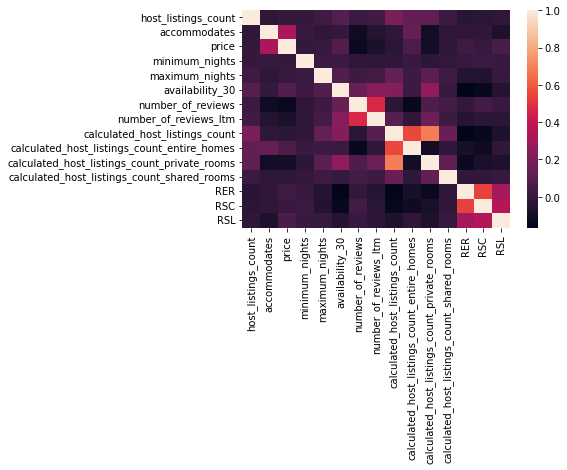

In [90]:
sns.heatmap(df_TN.corr());

In [91]:
#df_TN.fillna(1,inplace=True)

### Definicion de Modelo con Train: 

- De aqui sacamos la variabl modelo, para hacer la prediccion con el TEST!!

### * Con LinReg

In [92]:
X_train, X_test, y_train, y_test = tts(df_TN.drop('price',axis=1), 
                                               df_TN.price)

In [93]:
modelo=LinReg()

modelo.fit(X_train, y_train)

LinearRegression()

In [94]:
### 1.3.1 R2

In [95]:
modelo.score(X_test, y_test)# R2 cuanto mas cercano a 1 mejor 

0.09490737744439459

In [96]:
y_pred=modelo.predict(X_test)
y_pred.shape

(1042,)

### 1.3.2 MSE (Mean Squared Error)

In [97]:
mse(y_pred, y_test, squared=False)

212.38122134286493

### Feature importances with a forest of trees

In [98]:
X, y = make_classification(
    n_samples=1000,
    n_features=11,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [99]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [100]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.010 seconds


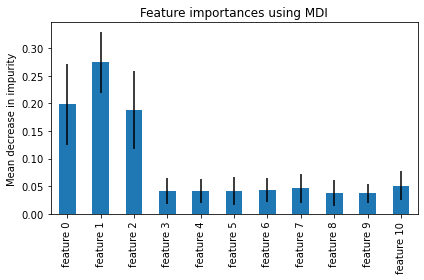

In [101]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [102]:
df_TN.head()

,host_listings_count,accommodates,price,minimum_nights,maximum_nights,availability_30,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,RER,RSC,RSL
0,13,3,87.0,2,1125,0,81,0,10,0,10,0,4.62,4.57,4.69
1,0,4,250.0,2,1125,3,9,4,1,1,0,0,5.00,4.89,5.00
2,20,2,151.0,1,1125,25,47,3,20,4,0,0,4.79,4.62,4.87
3,1,2,139.0,2,30,0,10,3,1,1,0,0,5.00,5.00,4.90
4,1,2,95.0,2,7,18,166,1,1,0,1,0,4.67,4.95,4.49


**OBSERVACIONES:**

* 'accommodates','number_of_reviews','maximum_nights','minimum_nights','host_listings_count','price'
- 0.25277297410351574
*  * 'accommodates','number_of_reviews','maximum_nights','minimum_nights','host_listings_count','price','availability_30'
-ecm - 108


columnas objetivo:

- number_of_reviews
- bathrooms
- host_listings_count
- minimum_nights
- maximum_nights
- number_of_reviews
- accommodates
- Price
['accommodates','number_of_reviews','maximum_nights','minimum_nights','host_listings_count','price']

- property_type	
- room_type
- property_type_Other



In [170]:
df_TN_1 = df_TN[['accommodates','number_of_reviews','maximum_nights','minimum_nights','host_listings_count','price','availability_30']]

In [171]:
#df_TN_1['bathrooms']= df_train.bathrooms_text.apply(limpieza_ba)

In [172]:
df_TN_1.head()

,accommodates,number_of_reviews,maximum_nights,minimum_nights,host_listings_count,price,availability_30
0,3,81,1125,2,13,87.0,0
1,4,9,1125,2,0,250.0,3
2,2,47,1125,1,20,151.0,25
3,2,10,30,2,1,139.0,0
4,2,166,7,2,1,95.0,18


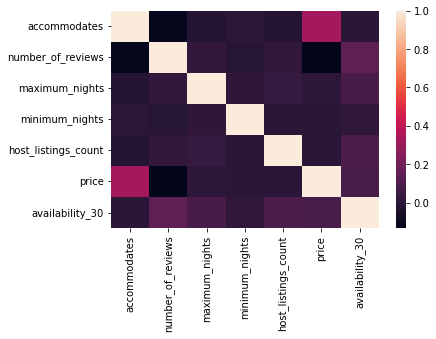

In [173]:
sns.heatmap(df_TN_1.corr());

### Definicion de Modelo con Train: 

- De aqui sacamos la variabl modelo, para hacer la prediccion con el TEST!!

### * Con LinReg

In [174]:
X_train, X_test, y_train, y_test = tts(df_TN_1.drop('price',axis=1), 
                                               df_TN_1.price)

In [175]:
modelo=LinReg()

modelo.fit(X_train, y_train)

LinearRegression()

In [176]:
### 1.3.1 R2

In [177]:
modelo.score(X_test, y_test)# R2 cuanto mas cercano a 1 mejor 

0.34911011397702374

In [178]:
y_pred=modelo.predict(X_test)
y_pred.shape

(1042,)

### 1.3.2 MSE (Mean Squared Error)

In [179]:
mse(y_pred, y_test, squared=False)

91.91566841255616

### Feature importances with a forest of trees

In [113]:
X, y = make_classification(
    n_samples=100,
    n_features=6,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [114]:


feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [115]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.073 seconds


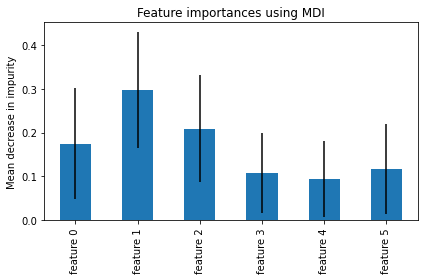

In [116]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### 2. Modelo Train Data:

In [117]:
X=df_TN_1.drop('price', axis=1)
y=df_TN_1.price

In [142]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       test_size=0.40, random_state=42)

In [143]:
modelos=[LinReg(),SGDC(),RFR()]

for m in modelos:
    prueba_modelo(m)

LinearRegression()
Train: 0.13190210547574577
Test: 0.10135270745850111


SGDClassifier()
Train: 0.01
Test: 0.004799040191961607


RandomForestRegressor()
Train: 0.7908084363802863
Test: -0.1732900220308322




**RANDOM FOREST REGRESSOR**

In [138]:
modelo_RFR = RFR()

modelo_RFR.fit(X_train, y_train)


RandomForestRegressor()

In [139]:
modelo_RFR.score(X_test, y_test)

-0.45849131458419334

In [140]:
y_pred=modelo_RFR.predict(X_test)

In [141]:
mse(y_pred, y_test, squared=False)

219.85968221627692

## NO TOCAR!!!

In [ ]:
'''n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for estimator in n_estimators:
    modelo = RFR(n_estimators=estimator, n_jobs=-1)
    modelo.fit(X_train, y_train)
    train_pred = rf.predict(X_train)'''
    
      

* RFR Parameters

bootstrap=True,
max_depth=None, max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0,
n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
verbose=0, warm_start=False

## NO TOCAR!!!

## Observaciones:

Observaciones: 

Prueba_1:
- get numeric
- trash_d()
- delete_nan()
- df_test.assign

**Result:**

    *LinearRegression()
    Train: 0.37710208858587135
    Test: 0.43879805502855285
    
    *RandomForestRegressor()
    Train: 0.9121256146108578
    Test: 0.45649570390552463
    
    *SGDClassifier()
    Train: 0.01098901098901099
    Test: 0.0038910505836575876

## 2. Test CSV:

In [180]:
df_ts=pd.read_csv('data/test.csv')

In [181]:
df_test= df_ts._get_numeric_data()

In [182]:
trash_d(df_test)

['id', 'scrape_id', 'host_id', 'latitude', 'longitude']


In [183]:
delete_nan(df_test)

Index(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'], dtype='object')


### 70% de correlacion:

In [186]:
bin_corr_col(df_test)

['host_total_listings_count', 'beds', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_l30d', 'review_scores_accuracy']


In [187]:
#sns.heatmap(df_TN.corr());

### Tratamiento de los Nan VALUES rows

### Review Score Mean - Nan

In [188]:
df_NAN_1 = df_ts[['review_scores_rating','review_scores_checkin','review_scores_location']]


In [189]:
fill_nan(df_NAN_1)

review_scores_rating      0
review_scores_checkin     0
review_scores_location    0
dtype: int64


/var/folders/xt/vx2zkv116hb1jvz92s1nlr2r0000gn/T/ipykernel_52588/4126439838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(round(df[i].mean(),3), inplace=True)


In [190]:
df_test = df_test.assign(RER=df_NAN_1.review_scores_rating.values,
              RSC=df_NAN_1.review_scores_checkin.values,
              RSL=df_NAN_1.review_scores_location.values)

In [191]:
cols_del = ['review_scores_rating','review_scores_checkin','review_scores_location','review_scores_cleanliness','review_scores_communication','review_scores_value','bedrooms','reviews_per_month']
df_test.drop(cols_del, axis=1, inplace=True)

In [192]:
df_test.isna().sum()

host_listings_count                             0
accommodates                                    0
minimum_nights                                  0
maximum_nights                                  0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
availability_30                                 0
number_of_reviews                               0
number_of_reviews_ltm                           0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
RER                                             0
RSC                                             0
RSL                                             0
dtype: int64

In [193]:
col_del_2 =['minimum_maximum_nights','maximum_maximum_nights']

In [194]:
df_test.drop(col_del_2, axis=1, inplace=True)

In [196]:
df_test.shape

(1389, 14)

In [197]:
df_TN.isna().sum()

host_listings_count                             0
accommodates                                    0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
number_of_reviews                               0
number_of_reviews_ltm                           0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
RER                                             0
RSC                                             0
RSL                                             0
dtype: int64

In [195]:
df_test.isna().sum()

host_listings_count                             0
accommodates                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
number_of_reviews                               0
number_of_reviews_ltm                           0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
RER                                             0
RSC                                             0
RSL                                             0
dtype: int64

In [198]:
df_test.head()

,host_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,RER,RSC,RSL
0,1,1,2,1125,29,2,2,1,0,1,0,5.000,5.000,5.000
1,0,2,1,365,0,0,0,12,0,10,2,4.787,4.787,4.787
2,1,2,5,1125,0,10,0,1,1,0,0,4.780,4.780,4.330
3,2,2,3,1125,0,41,0,2,0,2,0,4.610,4.830,4.950
4,0,2,2,5,0,0,0,1,1,0,0,4.787,4.787,4.787


In [200]:
df_test_1= df_test[['accommodates','number_of_reviews','maximum_nights','minimum_nights','host_listings_count','availability_30']]

In [208]:
df_test_1.shape

(1389, 6)

### Prediction on Test DF

Here we place the **Test DF** into the model we have trained. 



In [216]:
y_pred=modelo.predict(df_test_1)

In [217]:
y_pred.shape

(1389,)

In [211]:
f"Train : {modelo.score(X_train, y_train)} Test: {modelo.score(X_test, y_test)}"


'Train : 0.10271213762064946 Test: 0.34911011397702374'

In [212]:
modelo.fit(X_train, y_train)

LinearRegression()

In [214]:
train_score=modelo.score(X_train, y_train)  
test_score=modelo.score(X_test, y_test)
    
print(modelo)
print('Train:', train_score)
print('Test:', test_score) 
print('\n')

LinearRegression()
Train: 0.10271213762064946
Test: 0.34911011397702374




In [215]:
y_pred.shape

(1042,)

### Guardar modelo:

Here we place the 

In [218]:
sample_df_3=pd.DataFrame()


sample_df_3['id']=[str(i) for i in range(len(y_pred))]
sample_df_3['price']=y_pred

sample_df_3.shape

(1389, 2)

In [219]:
sample_df_3.head()

,id,price
0,0,158.817011
1,1,127.889195
2,2,126.755619
3,3,119.562027
4,4,126.998981


In [220]:
sample_df_3.to_csv('data/sample_df_3.csv',index=False)